In [ ]:
# Custom RNN

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
import tensorflow_hub as hub

from tensorflow.keras.callbacks import ReduceLROnPlateau



# Transfer Learning with InceptionV3

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))


Num GPUs Available:  1


In [21]:
data_dir = "/Users/narendrafuloria/Desktop/Indian_Dataset cleaned 2/"
train_path = "/Users/narendrafuloria/Desktop/Indian_Dataset cleaned 2/Final_Training/Images/"
test_path = "//Users/narendrafuloria/Desktop/Indian_Dataset cleaned 2/Final_Test/Images/"
height = 64
width = 64

In [22]:
classes = { 0:'Give way',
            1:'No entry',
            2:'One-way traffic',
            3:'One-way traffic',
            4:'No vehcils in both directions',
            5:'NO ENTRY FOR CYCLES',
            6:'NO ENTRY FOR GOODS VEHCILS',
            7:'NO ENTRY FOR PEDESTRIANS',
            8:'NO ENTRY FOR BULLOCK CARTS',
            9:'NO ENTRY FOR HAND CARTS',
            10:'NO ENTRY FOR MOTOR VEHCILS',
            11:'HEIGHT LIMIT',
            12:'WEIGHT LIMIT',
            13:'AXLE WEIGHT LIMIT',
            14:'LENGTH LIMIT',
            15:'NO LEFT TURN',
            16:'NO RIGHT TURN',
            17:'NO OVERTAKING',
            18:'MAXIMUM SPEED LIMIT 90KM/HR',
            19:'MAXIMUM SPEED LIMIT 110 KM/HR',
            20:'HORN PROHIBITED',
            21:'NO PARKING',
            22:'NO STOPPING',
            23:'TURN LEFT',
            24:'TURN RIGHT',
            25:'STEEP DESCENT',
            26:'STEEP ASCENT',
            27:'NARROW ROAD',
            28: 'NARROW BRIDGE',
            29:'UNPROTECTED QUAY',
            30:'ROAD HUMP',
            31:'DIP',
            32:'LOOSE GRAVEL',
            33:'FALLING ROCKS',
            34:'CATTLE',
            35:'CROSSROADS',
            36:'SIDE ROAD JUNCTION',
            
            38:'OBLIQUE SIDE ROAD JUNCTION',
            40:'T- JUNCTION',
            41:'Y-JUNCTION',
            42:'STAGGERD SIDE ROAD JUNCTION',
            
            44: 'ROUNDABOUT',
            45: 'GUARDED LEVEL CROSSING AHEAD',
            46: 'UNGUARDED LEVEL CROSSING AHEAD',
            47: 'LEVEL CROSSING COUNTDOWN MARKER',

            51: 'PARKING',
            52: 'BUS STOP',
            53: 'FIRST AID POST',
            54: 'TELEPHONE',
            55: 'FILLING STATION',
            56: 'HOTEL',
            57: 'RESTAURANT',
            58: 'REFRESHMENTS'}
            

In [23]:
batch_size = 100
seed = 42

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')
print(len(train_dataset))

Found 10182 images belonging to 53 classes.
Found 2517 images belonging to 53 classes.
102


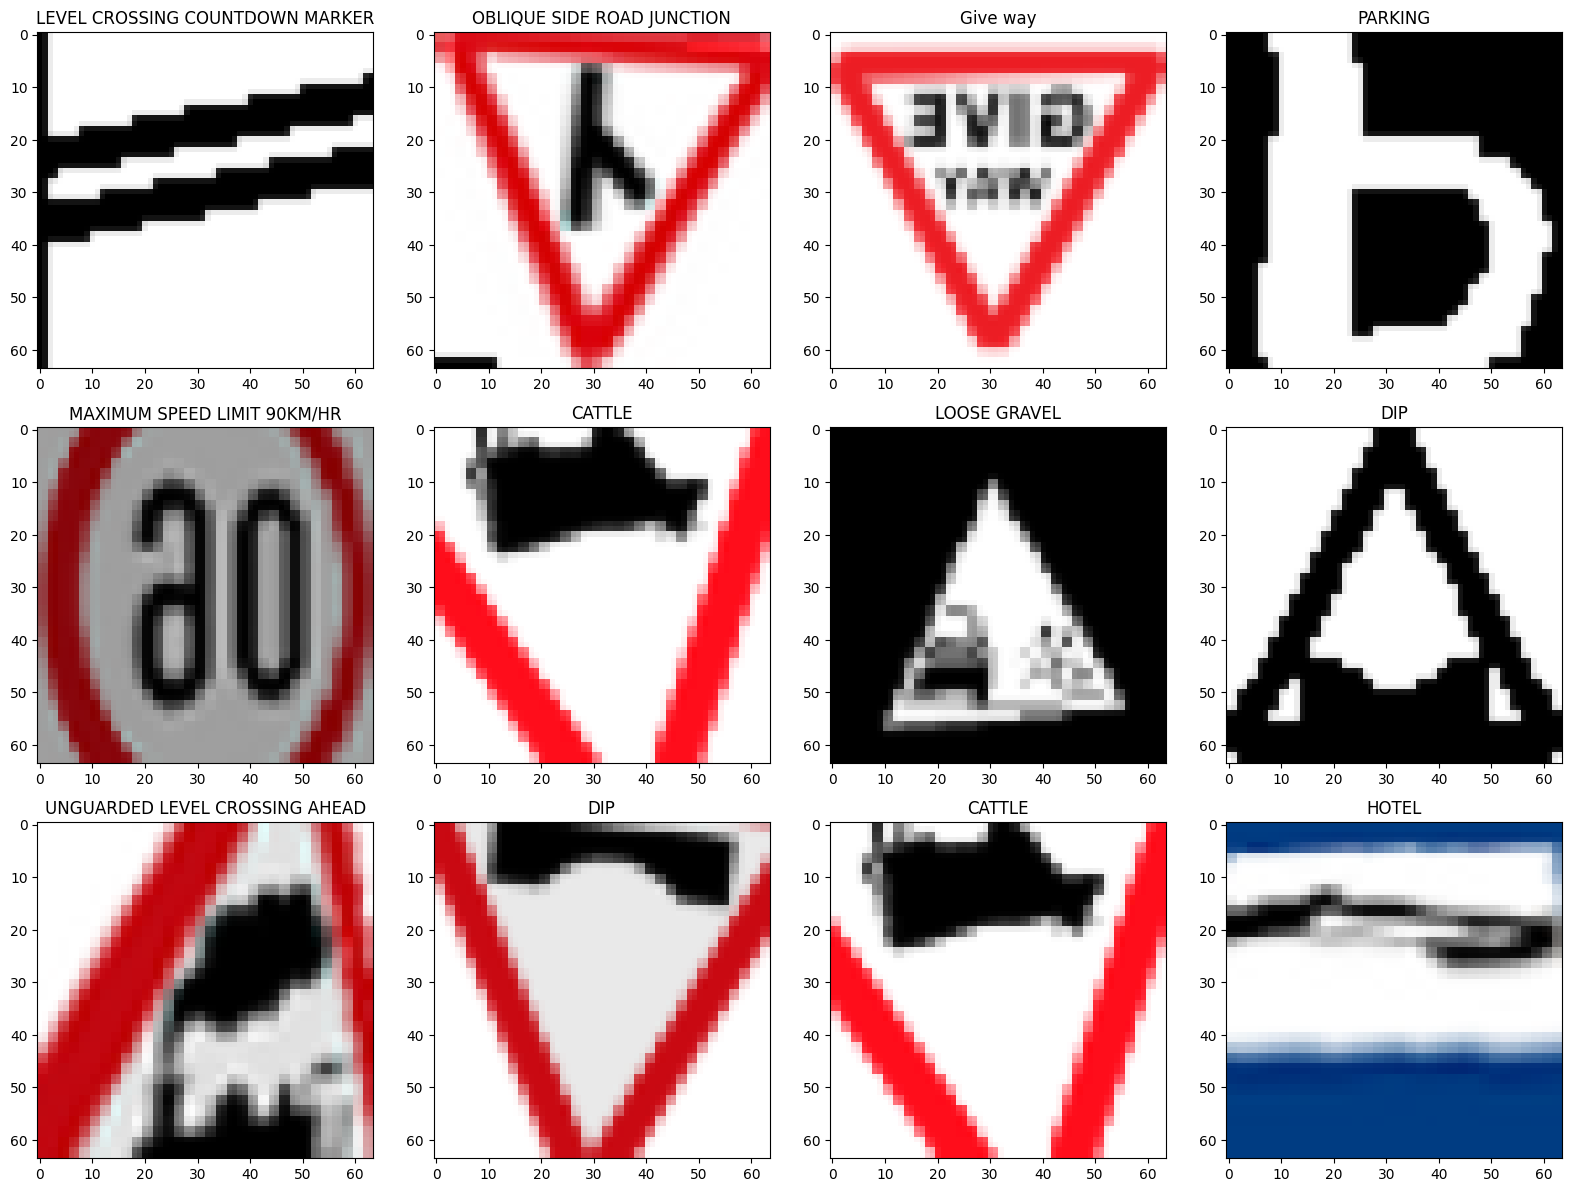

In [25]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64 , kernel_size=(3,3), activation='swish', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters= 128, kernel_size=(3,3), activation='swish'),

    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),


    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='swish'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='swish'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters= 256, kernel_size=(3,3), activation='swish'),
    keras.layers.Conv2D(filters= 512, kernel_size=(3,3), activation='swish'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    # keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='swish'),
    # keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='swish'),
    # keras.layers.MaxPool2D(pool_size=(2, 2)),
    # keras.layers.BatchNormalization(axis=-1),


    keras.layers.Flatten(),
    # keras.layers.Dense(1024, activation='swish'),
    # keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(2048, activation='swish'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),


    keras.layers.Dense(53, activation='softmax')
])

In [27]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 62, 62, 64)        1792      
                                                                 
 conv2d_101 (Conv2D)         (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 batch_normalization_99 (Ba  (None, 30, 30, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_102 (Conv2D)         (None, 28, 28, 128)       147584    
                                                                 
 conv2d_103 (Conv2D)         (None, 26, 26, 128)      

In [28]:
alpha= 0.001
epochs=20
optim = keras.optimizers.legacy.Adam(learning_rate=alpha)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.5,          # Factor by which the learning rate will be reduced
    patience=3,         # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-2,      # Minimum change to qualify as an improvement
    cooldown=0,          # Number of epochs to wait before resuming normal operation after lr has been reduced
    min_lr=1e-6          # Lower bound on the learning rate
)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])





In [29]:

history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset), callbacks = (reduce_lr))
                

Epoch 1/20
102/102 [==============================] - 53s 509ms/step - loss: 2.0625 - accuracy: 0.5608 - val_loss: 13.8306 - val_accuracy: 0.0219 - lr: 0.0010
Epoch 2/20
102/102 [==============================] - 52s 508ms/step - loss: 0.6334 - accuracy: 0.8292 - val_loss: 14.2214 - val_accuracy: 0.0723 - lr: 0.0010
Epoch 3/20
102/102 [==============================] - 57s 556ms/step - loss: 0.3636 - accuracy: 0.8929 - val_loss: 10.8093 - val_accuracy: 0.0715 - lr: 0.0010
Epoch 4/20
102/102 [==============================] - 57s 554ms/step - loss: 0.2562 - accuracy: 0.9225 - val_loss: 4.4275 - val_accuracy: 0.3083 - lr: 0.0010
Epoch 5/20
102/102 [==============================] - 56s 544ms/step - loss: 0.1793 - accuracy: 0.9462 - val_loss: 1.6996 - val_accuracy: 0.5864 - lr: 0.0010
Epoch 6/20
102/102 [==============================] - 56s 545ms/step - loss: 0.1447 - accuracy: 0.9536 - val_loss: 0.5229 - val_accuracy: 0.8530 - lr: 0.0010
Epoch 7/20
102/102 [=============================

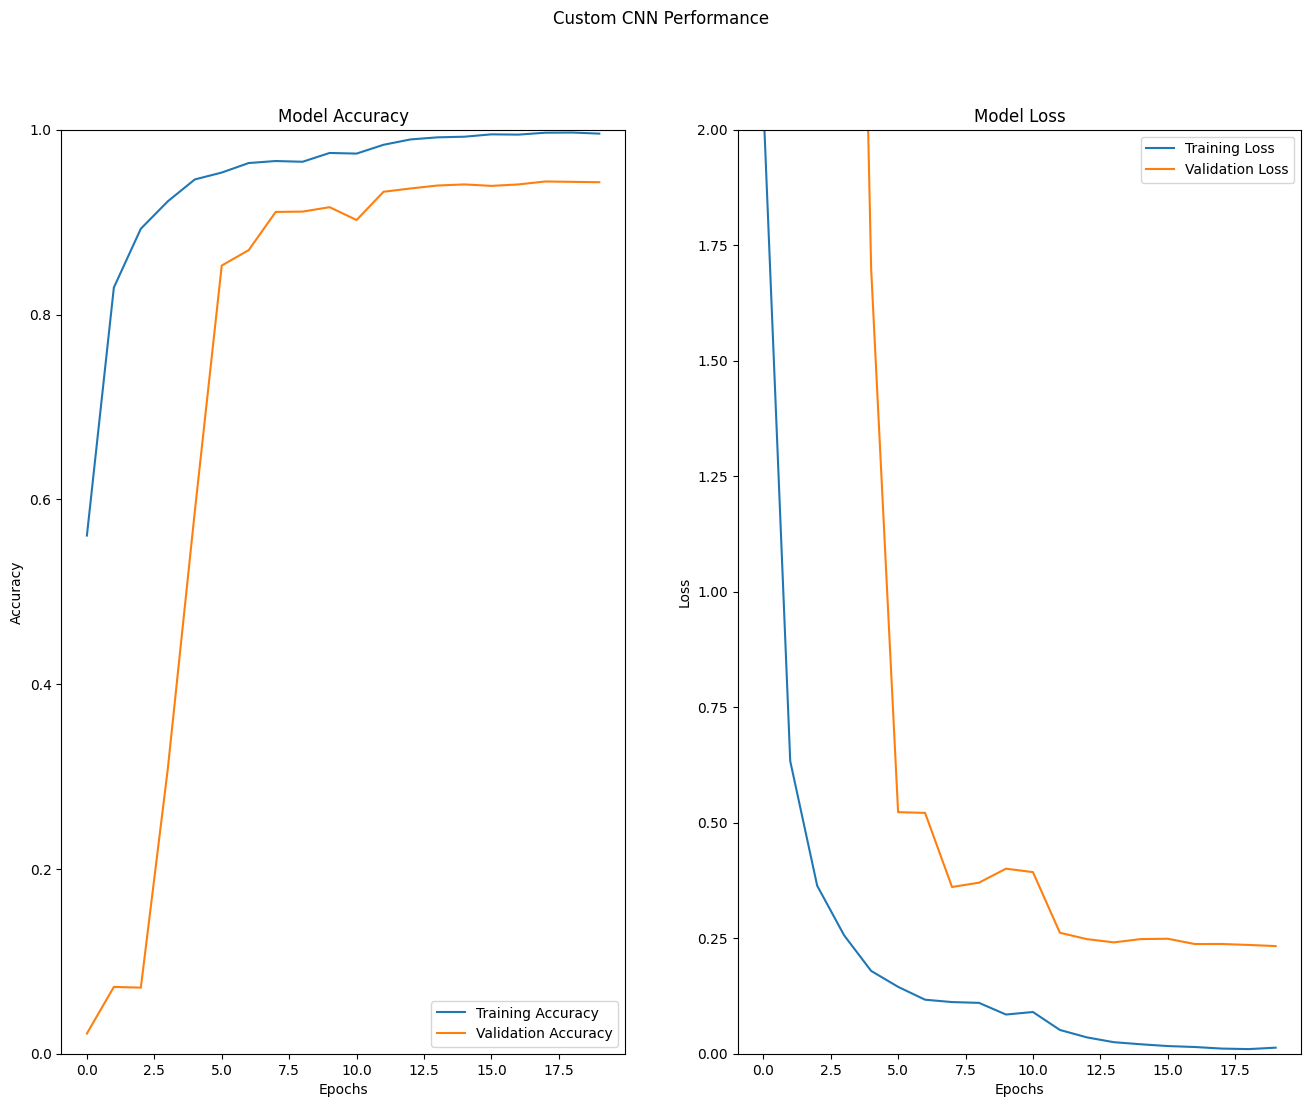

<Figure size 1000x700 with 0 Axes>

In [30]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,2)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [31]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
# test_df = pd.read_csv('/Users/narendrafuloria/content/GTSRB/Final_Test/Images/GT-final_test.csv',delimiter=';')

test_labels = np.array([])
imgs = np.array([])
for filename in os.listdir(test_path):
    
    if filename[0:2] != ".D":

        i = np.array(int(filename[0:2]))
        test_labels = np.append(test_labels , i)
        imgs = np.append(imgs,filename)
  

   
# print(imgs)


data =[]

for img in imgs:
    try:
        image = cv2.imread(test_path +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255


In [32]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)

pred = map_pred(pred.argmax(axis=-1))

print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

26/26 [==============================] - 1s 45ms/step
Test Data accuracy:  73.77450980392157


4/4 [==============================] - 0s 82ms/step


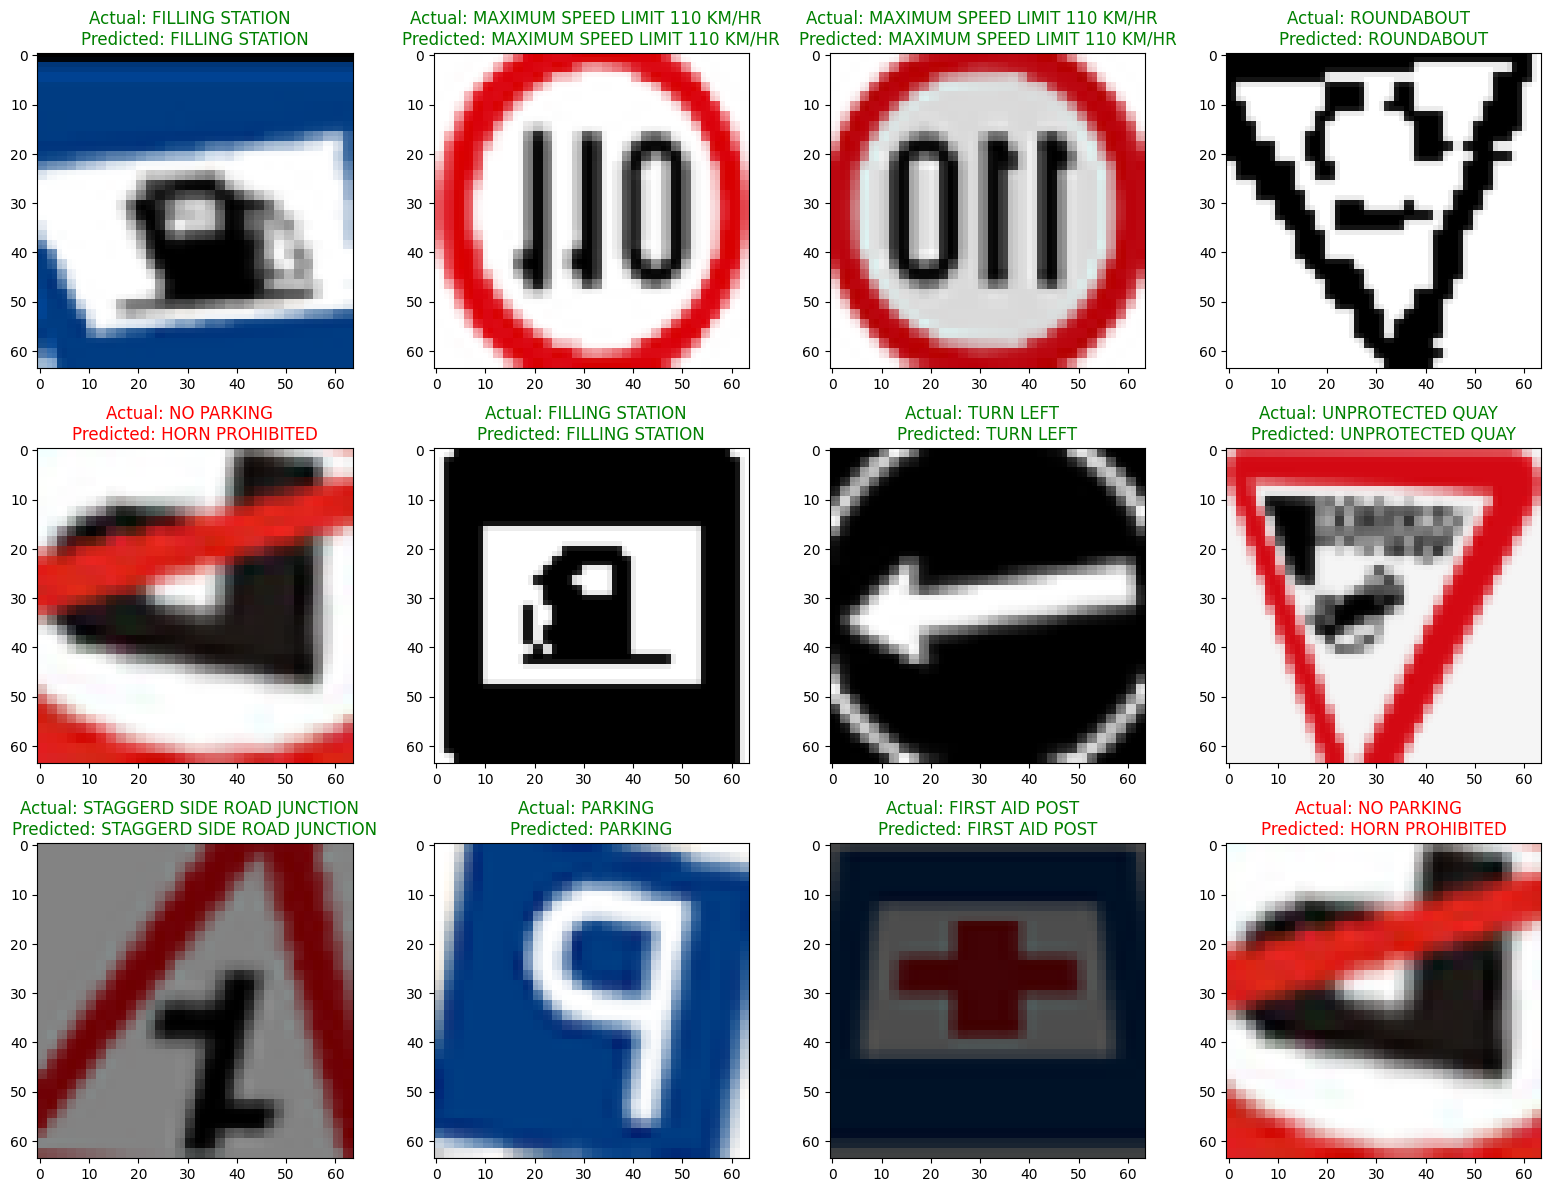

In [33]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()

# INCEPTION V3- BASED MODEL ARCHITECTURE

In [34]:

# Load InceptionV3 pre-trained on ImageNet
inception_height = 75
inception_width = 75
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(inception_height, inception_width, 3))
base_model.trainable = False

In [35]:
incept_model = tf.keras.Sequential([base_model,
                                   keras.layers.GlobalAveragePooling2D(),
                                   keras.layers.Dropout(0.5),
                                   keras.layers.Dense(256, activation='relu'),
                                   keras.layers.BatchNormalization(),
                                   keras.layers.Dropout(rate=0.3),
                                   keras.layers.Dense(53, activation='softmax')
                                ])
incept_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization_197 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                                 
 dropout_7 (Dropout)         (None, 256)              

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(inception_height, inception_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(inception_height, inception_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')
print(len(train_dataset))

Found 10182 images belonging to 53 classes.
Found 2517 images belonging to 53 classes.
102


In [37]:
alpha=0.0001
epochs=15
optim = keras.optimizers.legacy.Adam(learning_rate=alpha)
incept_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
incept_history = incept_model.fit(train_dataset,
                            steps_per_epoch=len(train_dataset),
                            epochs=epochs,
                            validation_data=test_dataset,
                            validation_steps=len(test_dataset))

Epoch 1/15
102/102 [==============================] - 18s 174ms/step - loss: 2.4867 - accuracy: 0.3747 - val_loss: 2.0109 - val_accuracy: 0.5101
Epoch 2/15
102/102 [==============================] - 19s 183ms/step - loss: 2.1750 - accuracy: 0.4393 - val_loss: 1.7844 - val_accuracy: 0.5622
Epoch 3/15
102/102 [==============================] - 18s 179ms/step - loss: 1.9075 - accuracy: 0.4969 - val_loss: 1.6287 - val_accuracy: 0.5991
Epoch 4/15
102/102 [==============================] - 19s 183ms/step - loss: 1.7444 - accuracy: 0.5333 - val_loss: 1.5106 - val_accuracy: 0.6190
Epoch 5/15
102/102 [==============================] - 20s 191ms/step - loss: 1.6121 - accuracy: 0.5648 - val_loss: 1.4129 - val_accuracy: 0.6420
Epoch 6/15
102/102 [==============================] - 21s 208ms/step - loss: 1.4904 - accuracy: 0.5971 - val_loss: 1.3391 - val_accuracy: 0.6591
Epoch 7/15
102/102 [==============================] - 22s 212ms/step - loss: 1.3910 - accuracy: 0.6192 - val_loss: 1.2731 - val_ac

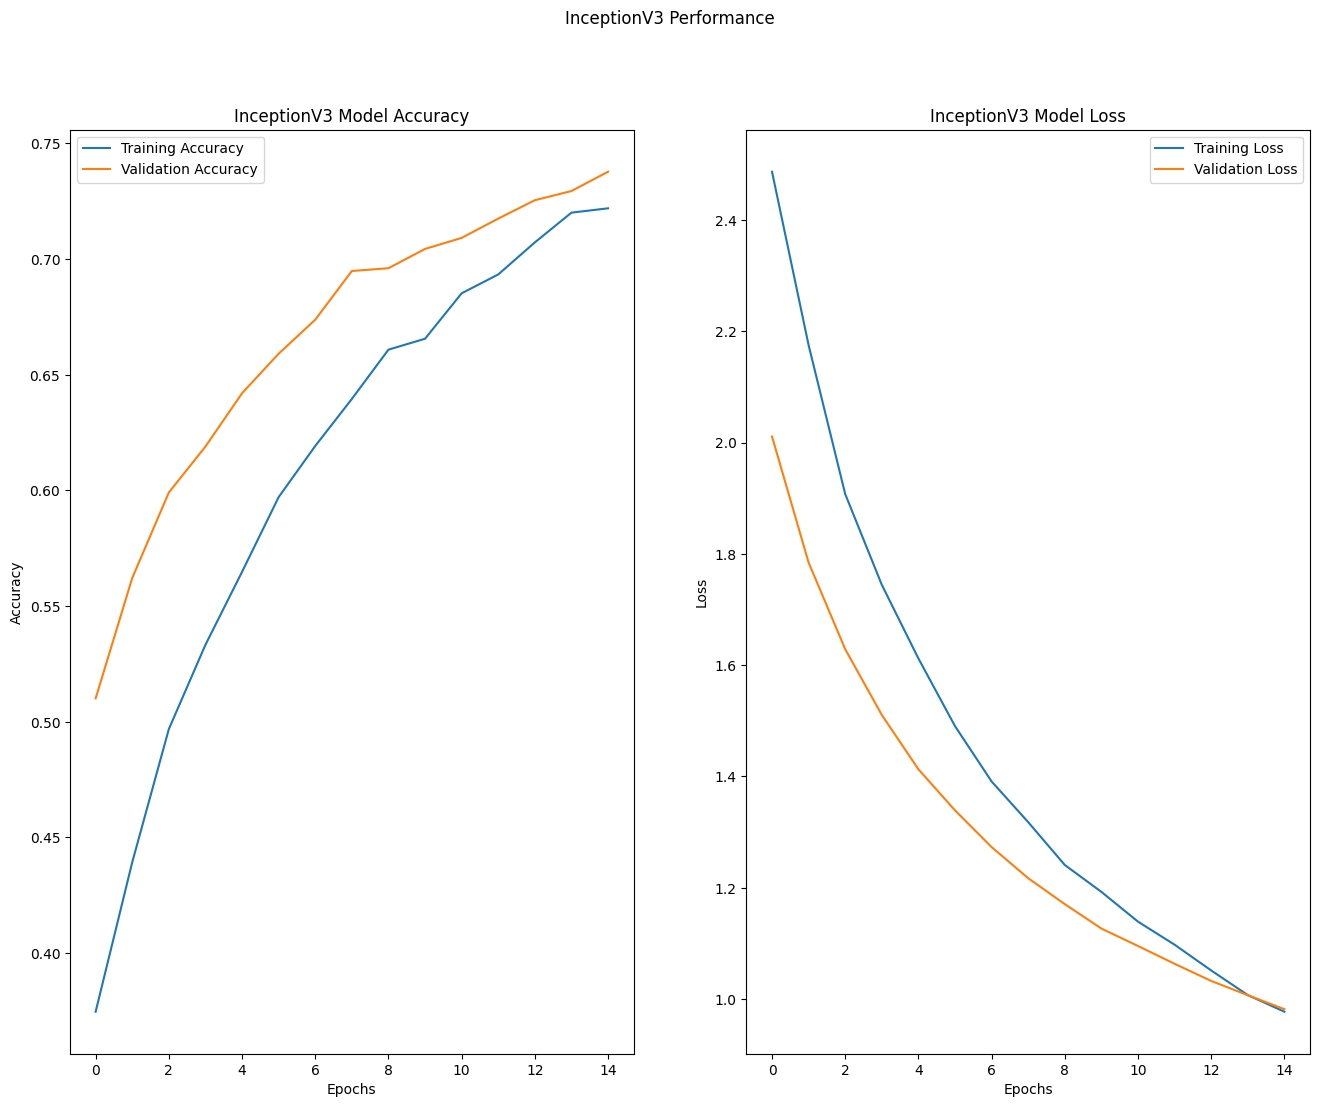

<Figure size 1000x700 with 0 Axes>

In [40]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(incept_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('InceptionV3 Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
# ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('InceptionV3 Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
# ax[0].set_ylim(0.5,1)
fig.suptitle('InceptionV3 Performance')
plt.show()

# Saving the InceptionV3-Based Model


# Mapping Predictions for InceptionV3 Model


In [21]:
# def map_pred(pred):
#     return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
# # test_df = pd.read_csv('/Users/narendrafuloria/content/GTSRB/Final_Test/Images/GT-final_test.csv',delimiter=';')

# destination_folder_2 = "/Users/narendrafuloria/Downloads/Indian_Dataset/Final_Test/Images/"
# print(destination_folder_2 )
# test_labels = np.array([])
# imgs = np.array([])
# for filename in os.listdir(destination_folder_2):
#     if filename[0:2] != ".D":
#         i = np.array(int(filename[0:2]))
#         test_labels = np.append(test_labels , i)
#         imgs = np.append(imgs,filename)
    
    

   
# # print(imgs)


# data =[]

# for img in imgs:
#     try:
#         image = cv2.imread(destination_folder_2 +img)
#         image_fromarray = Image.fromarray(image, 'RGB')
#         resize_image = image_fromarray.resize((height, width))
#         data.append(np.array(resize_image))
#     except:
#         print("Error in " + img)
# X_test_incept = np.array(data)
# X_test_incept = X_test_incept/255
# len(X_test_incept)

In [41]:
def map_pred_inception(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]

    
test_labels = np.array([])
imgs = np.array([])
    
for filename in os.listdir(test_path):
    
    if filename[0:2] != ".D":

        i = np.array(int(filename[0:2]))
        test_labels = np.append(test_labels , i)
        imgs = np.append(imgs,filename)

data_inception = []
for img in imgs:
    try:
        image = cv2.imread(test_path +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((inception_height, inception_width))
        data_inception.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test_incept = np.array(data_inception)
X_test_incept = X_test_incept/255

# Evaluating InceptionV3-Based Model on Test Data


In [42]:
from sklearn.metrics import accuracy_score
pred_incept = incept_model.predict(X_test_incept)
pred_incept = map_pred_inception(pred_incept.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred_incept)*100)

26/26 [==============================] - 5s 103ms/step
Test Data accuracy:  57.475490196078425


# MobileNetV2 as Base Model


In [43]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (height, width, 3), include_top = False, weights = "imagenet")
base_model.trainable = False

## MobileNetV2-Based Model Architecture


In [44]:
mob_model = tf.keras.Sequential([base_model,
                                   keras.layers.GlobalAveragePooling2D(),
                                   keras.layers.Dropout(0.2),
                                   keras.layers.Dense(512, activation='relu'),
                                   keras.layers.BatchNormalization(),
                                   keras.layers.Dropout(rate=0.2),
                                   keras.layers.Dense(53, activation='softmax')
                                ])
mob_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_8 (Dropout)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization_198 (B  (None, 512)               2048      
 atchNormalization)                                              
                                                      

## Model Compilation for MobileNetV2-Based Model


In [45]:
alpha=0.01
epochs=8
optim = keras.optimizers.legacy.Adam(learning_rate=alpha)
mob_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Training MobileNetV2-Based Model


In [46]:

mob_history = mob_model.fit(train_dataset,
                          steps_per_epoch=len(train_dataset),
                          epochs=epochs,
                          validation_data=test_dataset,
                          validation_steps=len(test_dataset))

Epoch 1/8
102/102 [==============================] - 13s 109ms/step - loss: 1.5343 - accuracy: 0.6056 - val_loss: 1.2511 - val_accuracy: 0.6953
Epoch 2/8
102/102 [==============================] - 8s 77ms/step - loss: 0.8349 - accuracy: 0.7557 - val_loss: 0.9679 - val_accuracy: 0.7346
Epoch 3/8
102/102 [==============================] - 8s 74ms/step - loss: 0.6420 - accuracy: 0.8047 - val_loss: 0.7629 - val_accuracy: 0.7815
Epoch 4/8
102/102 [==============================] - 8s 75ms/step - loss: 0.5394 - accuracy: 0.8325 - val_loss: 0.7712 - val_accuracy: 0.7870
Epoch 5/8
102/102 [==============================] - 8s 76ms/step - loss: 0.4907 - accuracy: 0.8502 - val_loss: 0.7611 - val_accuracy: 0.7990
Epoch 6/8
102/102 [==============================] - 8s 80ms/step - loss: 0.4362 - accuracy: 0.8594 - val_loss: 0.7607 - val_accuracy: 0.7982
Epoch 7/8
102/102 [==============================] - 8s 81ms/step - loss: 0.3851 - accuracy: 0.8763 - val_loss: 0.7251 - val_accuracy: 0.8002
Epoc

## MobileNetV2-Based Model Performance Visualization


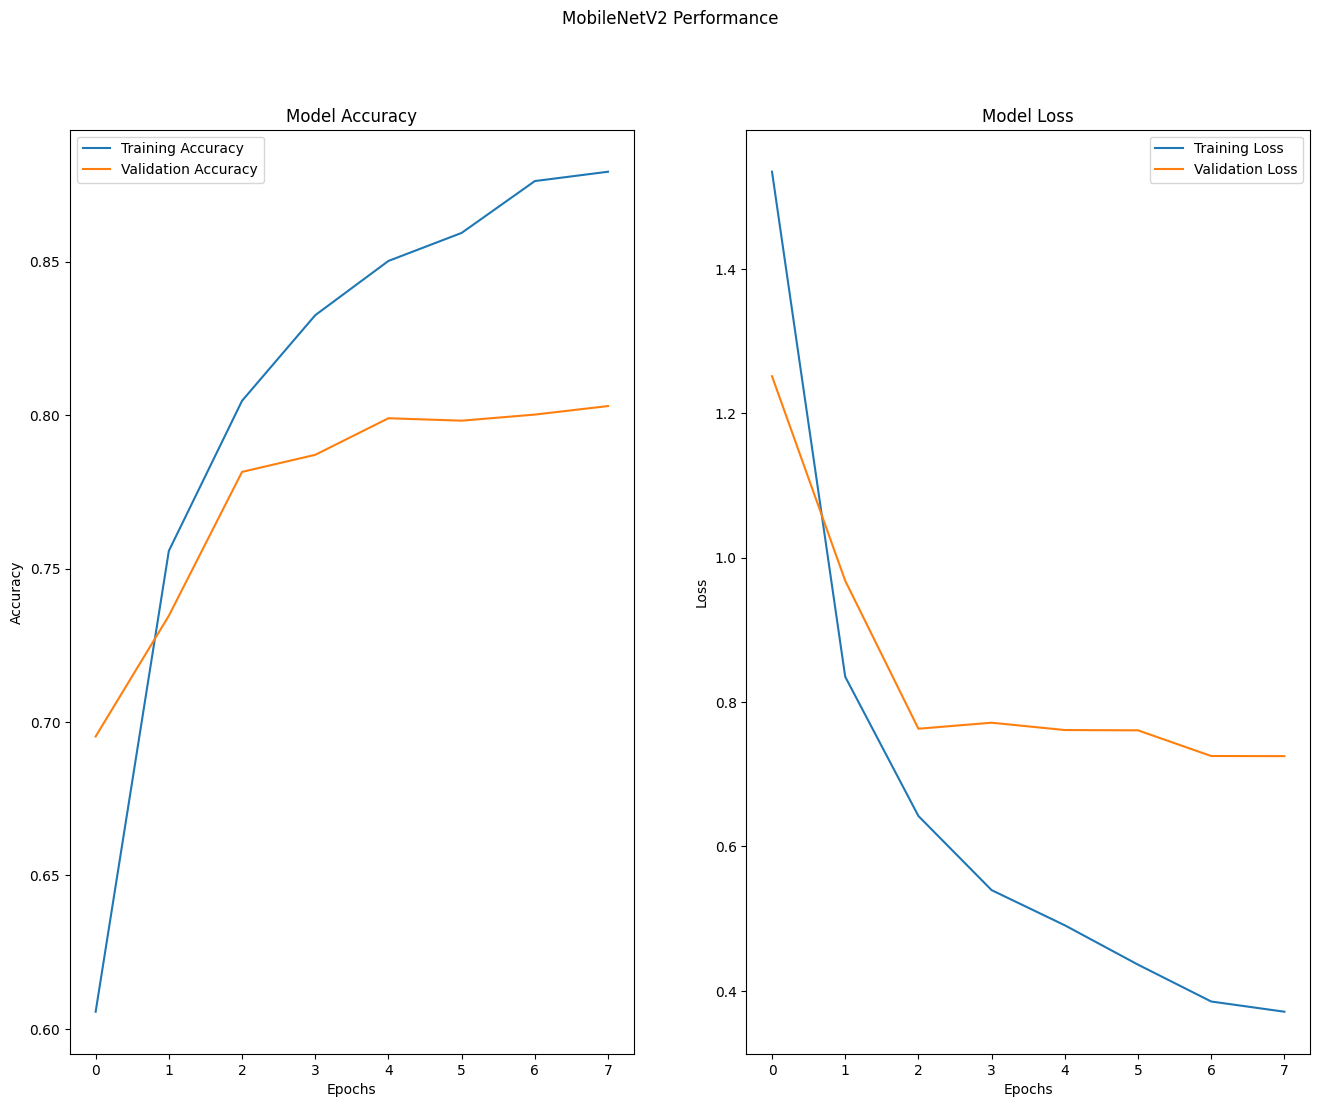

<Figure size 1000x700 with 0 Axes>

In [47]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(mob_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
# ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
# ax[0].set_ylim(0.5,1)
fig.suptitle('MobileNetV2 Performance')
plt.show()

## MobileNetV2-Based Model Evaluation on Test Data


In [48]:
from sklearn.metrics import accuracy_score
pred = mob_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

26/26 [==============================] - 3s 55ms/step
Test Data accuracy:  35.53921568627451


# VGG19-Based Model Architecture


In [49]:
vgg_model = tf.keras.Sequential([VGG19(weights='imagenet', include_top=False, input_shape=(height,width,3)),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation='sigmoid'),
                                 keras.layers.Dense(53, activation='softmax')
                                ])

vgg_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 batch_normalization_199 (B  (None, 2, 2, 512)         2048      
 atchNormalization)                                              
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               1049088   
                                                                 
 dense_11 (Dense)            (None, 53)                27189     
                                                                 
Total params: 21102709 (80.50 MB)
Trainable params: 21101685 (80.50 MB)
Non-trainable params: 1024 (4.00 KB)
___________

In [50]:
alpha=0.0001
epochs=8
optim = keras.optimizers.legacy.Adam(learning_rate=alpha)
vgg_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Model Compilation for VGG19-Based Model


In [51]:
alpha=0.0001
epochs=8
optim = keras.optimizers.legacy.Adam(learning_rate=alpha)
vgg_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Training VGG19-Based Model


In [52]:
print(train_dataset)
vgg_history = vgg_model.fit(train_dataset,
                        steps_per_epoch=len(train_dataset),
                        epochs=epochs,
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/8
102/102 [==============================] - 113s 1s/step - loss: 1.1147 - accuracy: 0.7707 - val_loss: 0.6729 - val_accuracy: 0.9491
Epoch 2/8
102/102 [==============================] - 123s 1s/step - loss: 0.1229 - accuracy: 0.9725 - val_loss: 0.2623 - val_accuracy: 0.9575
Epoch 3/8
102/102 [==============================] - 135s 1s/step - loss: 0.0653 - accuracy: 0.9807 - val_loss: 0.2024 - val_accuracy: 0.9515
Epoch 4/8
102/102 [==============================] - 136s 1s/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.1299 - val_accuracy: 0.9682
Epoch 5/8
102/102 [==============================] - 144s 1s/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0885 - val_accuracy: 0.9766
Epoch 6/8
102/102 [==============================] - 132s 1s/step - loss: 0.0416 - accuracy: 0.9883 - val_loss: 0.1474 - val_accuracy: 0.9531
Epoch 7/8
102/102 [==============================] - 134s 1s/step - loss: 0.0420 - accuracy: 0.9888 - val_loss: 0.1139 - val_accuracy: 0.9706
Epoch 

## VGG19-Based Model Performance Visualization


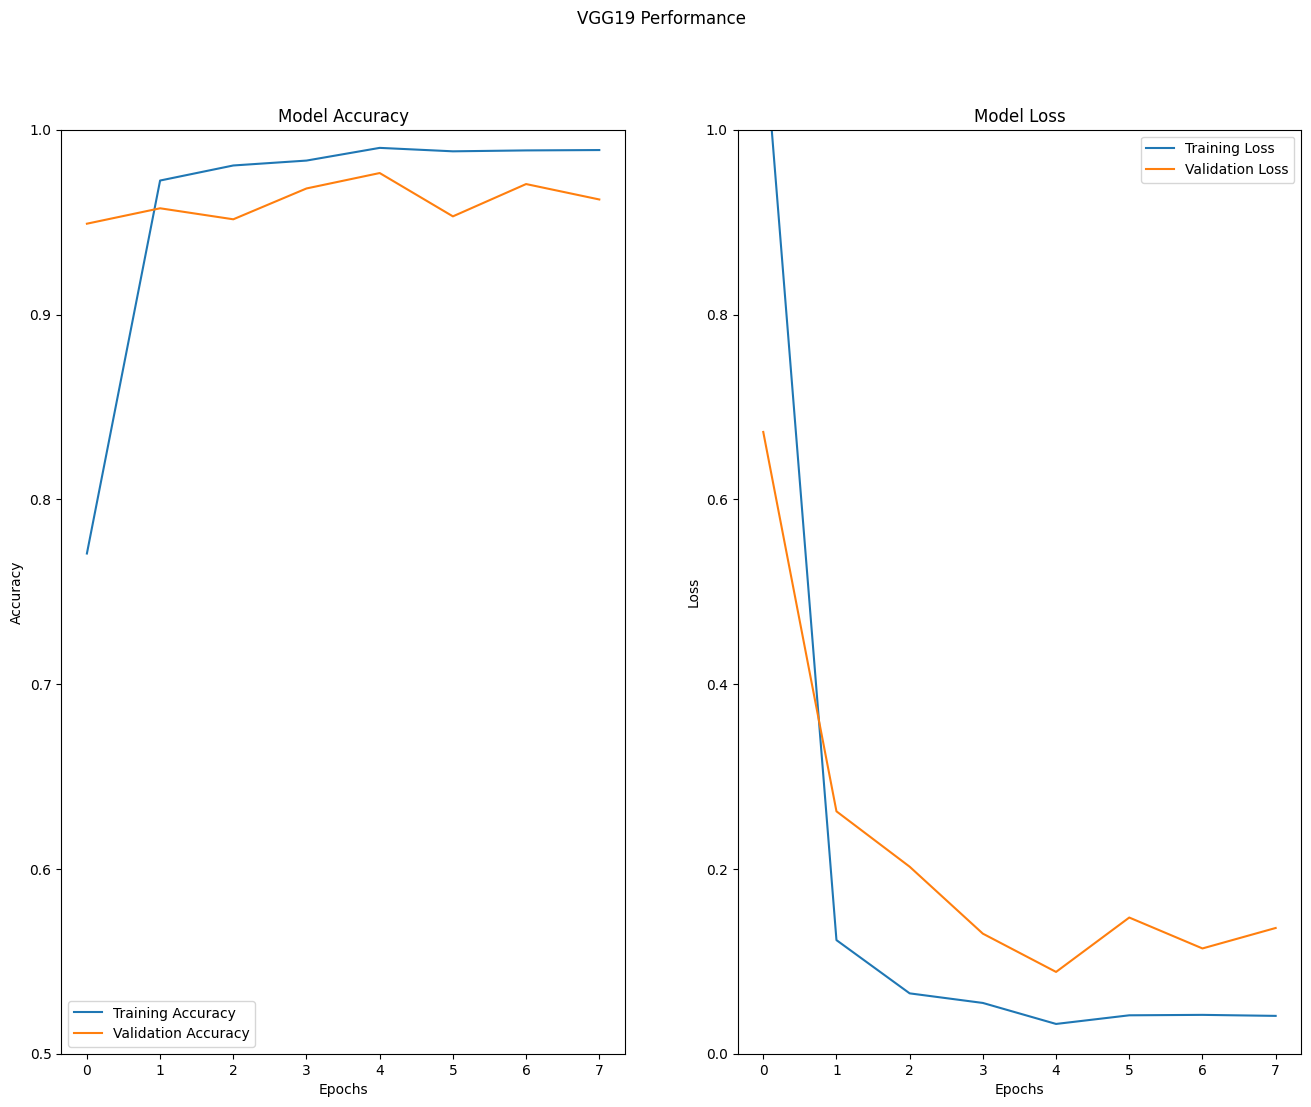

<Figure size 1000x700 with 0 Axes>

In [53]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(vgg_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('VGG19 Performance')
plt.show()

## VGG19-Based Model Evaluation on Test Data


In [54]:

from sklearn.metrics import accuracy_score
pred = vgg_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

26/26 [==============================] - 2s 73ms/step
Test Data accuracy:  87.00980392156863


## Visualizing VGG19 Model Predictions on Validation Data

4/4 [==============================] - 1s 139ms/step


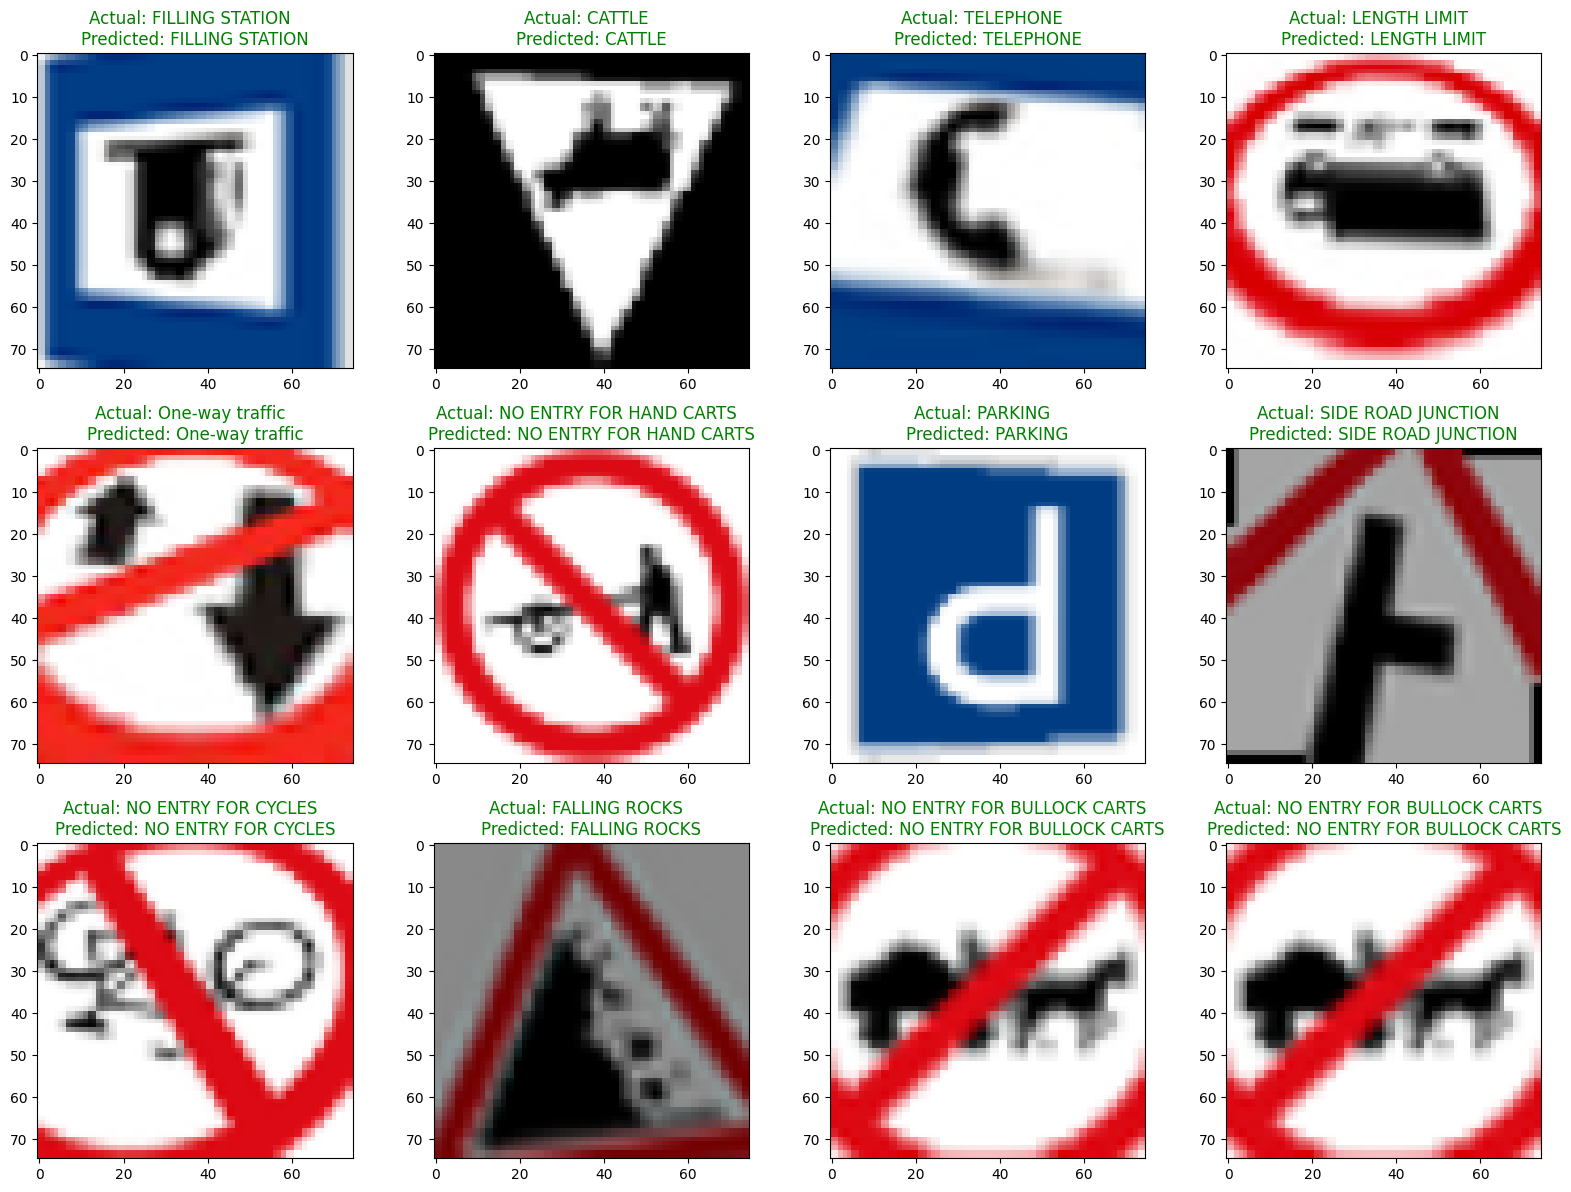

In [55]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = vgg_model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))
for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()